#  **Case Study:Bellabeat: How Can a Wellness Technology Company Play It Smart?**
![BELLA BEAT](https://thefemtechrevolution.co.nz/wp-content/uploads/2021/05/BellabeatPress_LeafUrban_Lifestyle_5.jpg)

Welcome to the Bellabeat data analysis case study.

**About Bellabeat**

Bella beat is a high-tech manufacturer of health-focused products for women.Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.Bellabeat products became available
through a growing number of online retailers in addition to their own e-commerce channel on [their website](https://bellabeat.com/).


**Key stakeholders**

Urška Sršen: Cofounder and Chief Creative Officer

Sando Mur: Cofounder and Mathematician



**Bellabeat products**

* Bellabeat app : The Bellabeat app connects to their line of smart wellness products
* Leaf: Classic wellness tracker can be worn as a bracelet, necklace, or clip
* Time:  A wellness watch that combines the timeless look of a classic timepiece with smart technology
* Spring: A water bottle that tracks daily water intake using smart technology 
* Bellabeat membership: A subscription-based membership program for users providing beauty and health tips 



**Business Task**

To analyze smart device usage data, find the relevant trends.

To apply these trends and analysis to Bellabeat users to support Bellabeat marketing strategy. 

# **Data source**

Data from FitBit Fitness Tracker related to 33users, tracking until a duration of 30days has been used.The data set contains 18 CSV files, of which we use below 11 files,as the other data is too large and is uncessesary.

* dailyActivity_merged.csv
* dailyCalories_merged.csv
* dailyIntensities_merged.csv
* dailySteps_merged.csv
* heartrate_seconds_merged.csv
* hourlyCalories_merged.csv
* hourlyIntensities_merged.csv
* hourlySteps_merged.csv
* sleepDay_merged.csv
* weightLogInfo_merged.csv
* minuteMETsNarro_merged.csv



# Prepare phase

Lets fisrt input data from Kaggle database

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(janitor)
list.files(path = "../input") #to input files from Kaggle database


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




[1] "bellabeat-dataset" "fitbit"

**Importing data related to daily activities**

In [2]:
#Loading the datasets

daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

daily_calories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")

daily_intensities <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")

daily_steps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the col

In [3]:
#Checking for colomn names in each file

colnames(daily_activity)

colnames(daily_intensities)


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

In [4]:
#Checking for number of distinct IDs in each file
n_distinct(daily_activity$Id)

n_distinct(daily_calories$Id)

n_distinct(daily_intensities$Id)

n_distinct(daily_steps$Id)

[1] 33

[1] 33

[1] 33

[1] 33

All 4 files , daily_activity, daily_calories, daily_intensities,daily_steps contain data for 33 distinct users. Of all, daily_activity can be used, as it contains consolidated data. 

**Importing hourly data**

In [5]:

library(tidyverse)

#Hourly calorie data
hcal <-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

#Hourly intensity data
hint <-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

#Hourly steps data

hstep <-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

#Checking for data validity
n_distinct(hcal$Id)
n_distinct(hint$Id)
n_distinct(hstep$Id)

[1] 33

[1] 33

[1] 33

In [6]:
#Checking out coloumns and their data types
str(hcal)
str(hint)
str(hstep)

'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...
'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...
'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


**Importing data from weight log**

In [7]:
library(tidyverse)

weight_log<- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

n_distinct(weight_log$Id)

#checking for nulls
sum(is.na(weight_log))


head(weight_log)

Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 8

[1] 65

Id         Date                  WeightKg WeightPounds Fat BMI  
1 1503960366 5/2/2016 11:59:59 PM   52.6    115.9631     22  22.65
2 1503960366 5/3/2016 11:59:59 PM   52.6    115.9631     NA  22.65
3 1927972279 4/13/2016 1:08:52 AM  133.5    294.3171     NA  47.54
4 2873212765 4/21/2016 11:59:59 PM  56.7    125.0021     NA  21.45
5 2873212765 5/12/2016 11:59:59 PM  57.3    126.3249     NA  21.69
6 4319703577 4/17/2016 11:59:59 PM  72.4    159.6147     25  27.45
  IsManualReport LogId       
1  TRUE          1.462234e+12
2  TRUE          1.462320e+12
3 FALSE          1.460510e+12
4  TRUE          1.461283e+12
5  TRUE          1.463098e+12
6  TRUE          1.460938e+12

**Importing heart-rate data**

In [8]:
library(tidyverse)

heart_rate <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

n_distinct(heart_rate$Id)

head(heart_rate)

[1] 14

Id         Time                 Value
1 2022484408 4/12/2016 7:21:00 AM  97  
2 2022484408 4/12/2016 7:21:05 AM 102  
3 2022484408 4/12/2016 7:21:10 AM 105  
4 2022484408 4/12/2016 7:21:20 AM 103  
5 2022484408 4/12/2016 7:21:25 AM 101  
6 2022484408 4/12/2016 7:22:05 AM  95

**Importing sleep data**

In [9]:
library(tidyverse)

sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

sleep_min <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")

n_distinct(sleep_day$Id)

n_distinct(sleep_min$Id)


[1] 24

[1] 24

**Importing MET data**

In [10]:
MET <-read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

n_distinct(MET$Id)


[1] 33

Overall, daily activity data is available for 33 users, hourly data is available for 33 users, sleep data is available for 24 users. Which means, combined data is available only for 24 users.

MET data is available for 33 users.Heart rate data is available for 14 users, weight data is available for 8 users only.

**Lets check if data satisfies ROCCC**

Reliability (LOW)-The data is incomplete and inaccurate as heart rate data is available for 14 users and weight data is available for 8 users.However, the data context admits availability of data for 7-33 users.

Originality (MEDIUM)-As in our case data has been used from Kaggle, rather directly from users.

Comprehensive(LOW)- Data is missing important information related to few users 

Current(LOW)- Data  belongs to 2016 and the analysis is being done in 2024.Hence it does not belong to latest data sets.

Cited(MEDIUM)- Data set contains acknowledgments to enumerator

# Processing phase

In [11]:
#Checking for null values in the daily_activity file

sum(is.na(daily_activity))




[1] 0

In [12]:
# Creating a new coloumn as `TotalActiveMinutes`

daily_activity <- daily_activity  %>%
        mutate(TotalActiveMinutes=VeryActiveMinutes+LightlyActiveMinutes+FairlyActiveMinutes)

head(daily_activity)


Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728    
  TotalActiveMinutes
1 366               
2 257               
3 222               
4 272               
5 267               
6 222

In [13]:
#Changing `ActivityDate` coloumn from string to date format 
##Adding a new coloumn `activity_date`

daily_activity = daily_activity %>% mutate(activity_date= mdy(ActivityDate))

#Converting dates to weekdays for further analysis

weekday_steps <- daily_activity %>%
                mutate(weekdays=weekdays(activity_date))

head(weekday_steps)
                        

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728    
  TotalActiveMinutes activity_date weekdays 
1 366                2016-04-12    Tuesday  
2 257                2016-04-13    Wednesday
3 222                2016-04-14    Thursday 
4 272                2016-04-15    Friday   
5 267                2016-04-16    Saturday 
6 222                2016-04-17    Sunday

In [14]:
#Checking where these nulls are from in `weight_log` file

library(dplyr)
weight_log %>%
count(IsManualReport)

IsManualReport n 
1 FALSE          26
2  TRUE          41

26 nulls have been found in weight log file as missing manual inputs from users.

**Joining dailyactivity file & weight log file by Id**

In [15]:
weight_log <- merge(daily_activity,weight_log, by ="Id")


head(weight_log)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/16/2016    12669      8.16          8.16           
2 1503960366 4/16/2016    12669      8.16          8.16           
3 1503960366 4/18/2016    13019      8.59          8.59           
4 1503960366 4/18/2016    13019      8.59          8.59           
5 1503960366 4/15/2016     9762      6.28          6.28           
6 1503960366 4/15/2016     9762      6.28          6.28           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        2.71               0.41                    
2 0                        2.71               0.41                    
3 0                        3.25               0.64                    
4 0                        3.25               0.64                    
5 0                        2.14               1.26                    
6 0                        2.14               1.26                    
  LightActiveDistance SedentaryActiveDistance ⋯ Calories TotalActiveMinutes
1 5.04                0                       ⋯ 1863     267               
2 5.04                0                       ⋯ 1863     267               
3 4.71                0                       ⋯ 1921     291               
4 4.71                0                       ⋯ 1921     291               
5 2.83                0                       ⋯ 1745     272               
6 2.83                0                       ⋯ 1745     272               
  activity_date Date                 WeightKg WeightPounds Fat BMI  
1 2016-04-16    5/2/2016 11:59:59 PM 52.6     115.9631     22  22.65
2 2016-04-16    5/3/2016 11:59:59 PM 52.6     115.9631     NA  22.65
3 2016-04-18    5/2/2016 11:59:59 PM 52.6     115.9631     22  22.65
4 2016-04-18    5/3/2016 11:59:59 PM 52.6     115.9631     NA  22.65
5 2016-04-15    5/2/2016 11:59:59 PM 52.6     115.9631     22  22.65
6 2016-04-15    5/3/2016 11:59:59 PM 52.6     115.9631     NA  22.65
  IsManualReport LogId       
1 TRUE           1.462234e+12
2 TRUE           1.462320e+12
3 TRUE           1.462234e+12
4 TRUE           1.462320e+12
5 TRUE           1.462234e+12
6 TRUE           1.462320e+12

# **Analysis phase**

**Calculating values from daily_activity data**

In [16]:
summary(daily_activity)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

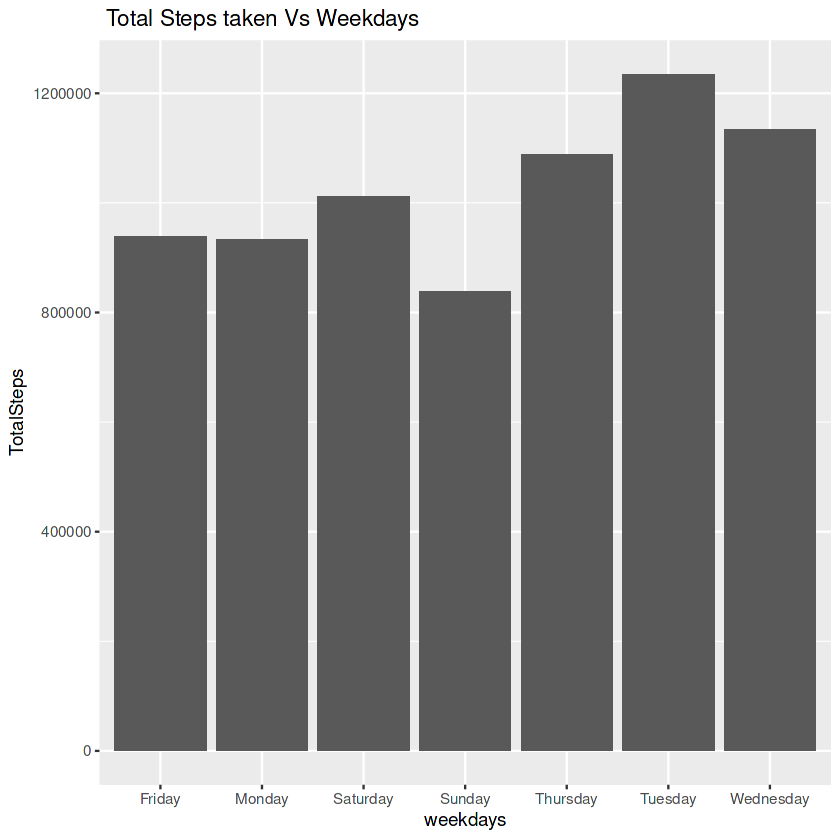

In [17]:
#Plotting relation between `number of steps taken` and `weekdays`

ggplot(data= weekday_steps)+ geom_col(aes(x=weekdays, y=TotalSteps))+ ggtitle(" Total Steps taken Vs Weekdays")

Plot shows that throughout the period of 30days, Tuesdays have recorded highest number of steps taken by users, follwed by Thursdays and Wednesdays.

Sunday remains as the day of least steps taken by users.

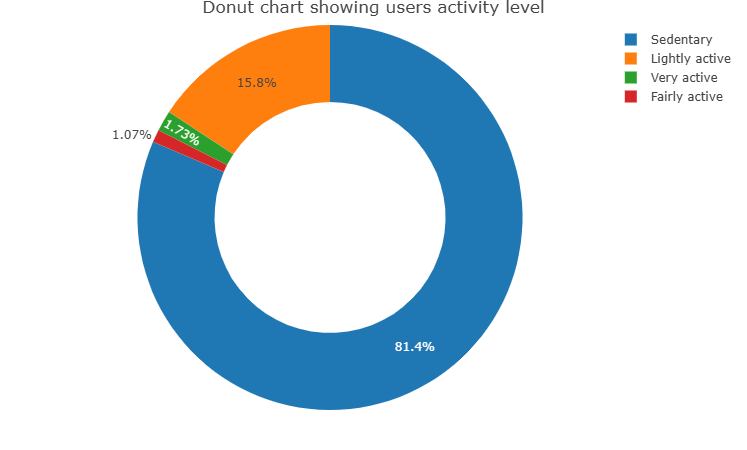

In [5]:

library('IRdisplay')
library(plotly)

#`mean_values` vector with values of very active, fairly active, lightly active and sedentary minutes

mean_values <- c(21, 13, 192,991)

labels <- c("Very active", "Fairly active", "Lightly active", "Sedentary")

#Plotting users based on their activity level 



fig <-  plot_ly(labels = ~labels, values = ~mean_values)
fig <- fig %>% add_pie(hole = 0.6)
fig <- fig %>% layout(title = "Donut chart showing users activity level",  showlegend = T,
                      xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
                      yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))
fig

 fig <- ggplotly(ggplot())

htmlwidgets::saveWidget(fig, "fig.html")

display_html("")


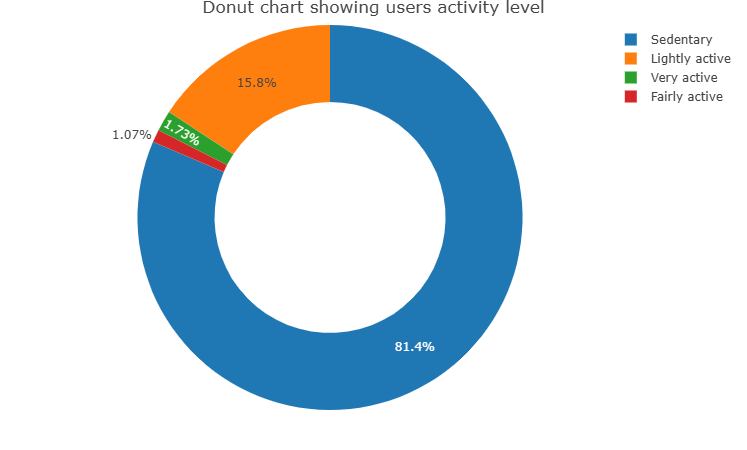

Chart shows 81.4%  users are sedentary which is a surprise , 15.8% are lightly active, 1.07% are fairly active and 1.73% are very active.

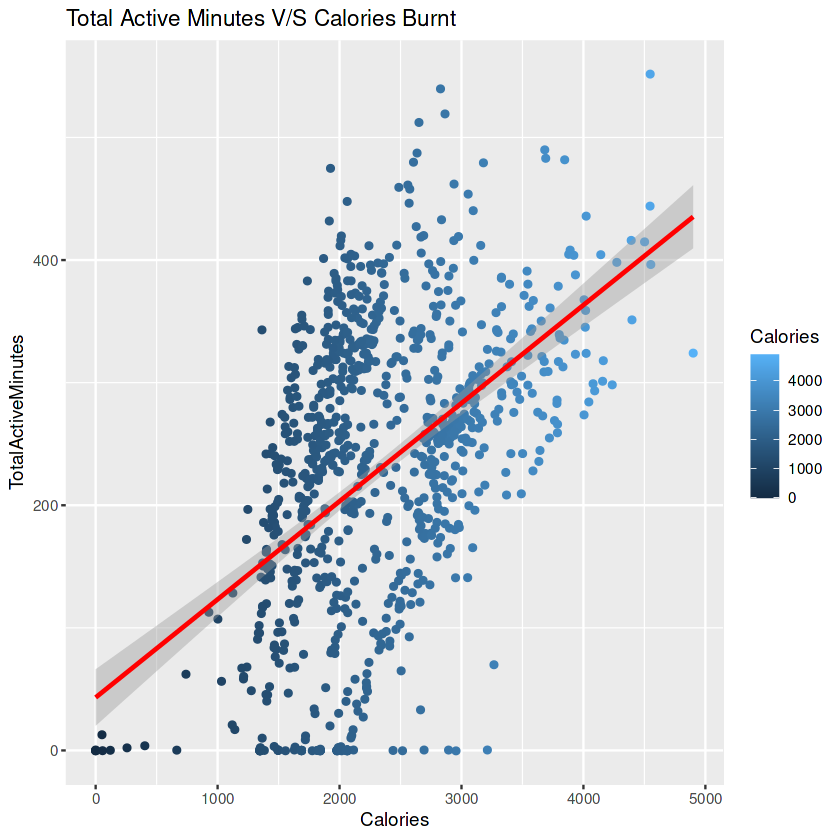

In [19]:
#Plot showing relation between total active minutes and calorie burn

ggplot(data= daily_activity)+ geom_jitter(mapping= aes(x=Calories,y= TotalActiveMinutes,color=Calories))+ geom_smooth(aes(x=Calories,y= TotalActiveMinutes),method=lm,formula = 'y ~ x', color="red")+

labs(title="Total Active Minutes V/S Calories Burnt")

This plot shows that there was a positive corelation between total active minutes and calories burnt.

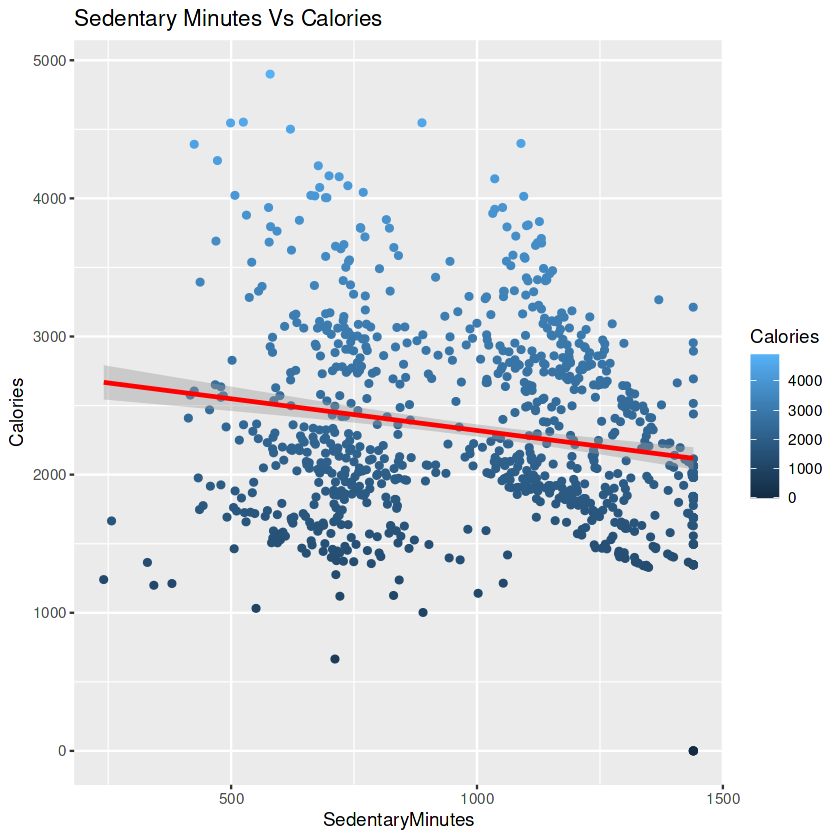

In [20]:
#Plotting relation between sedentary minutes and calories


library(ggplot2)

# filtering sedentary minutes greater than 240 for a clear plot

total_sedentary_min <- filter(daily_activity, SedentaryMinutes>240)


ggplot(data= total_sedentary_min)+ geom_jitter(mapping= aes(x=SedentaryMinutes, y= Calories, color= Calories))+ geom_smooth(aes(x=SedentaryMinutes, y= Calories), color="red",method=lm,formula = 'y ~ x' )+ ggtitle("Sedentary Minutes Vs Calories")




The plot shows, there was a negative correlation. As the sedentary minutes increase calories burnt decrease. [Sems Journal](https://sems-journal.ch/13002#:~:text=The%20present%20study%20demonstrates%20that,in%20sedentary%20conditions%20%5B5%5D) suggests that limiting sedentary time to less than 6 hours per day(360minutes) could lower the risk of obesity.

On the other hand, it was identified that most of the users have recorded 500-1000 sedentary minutes which can be a health risk.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


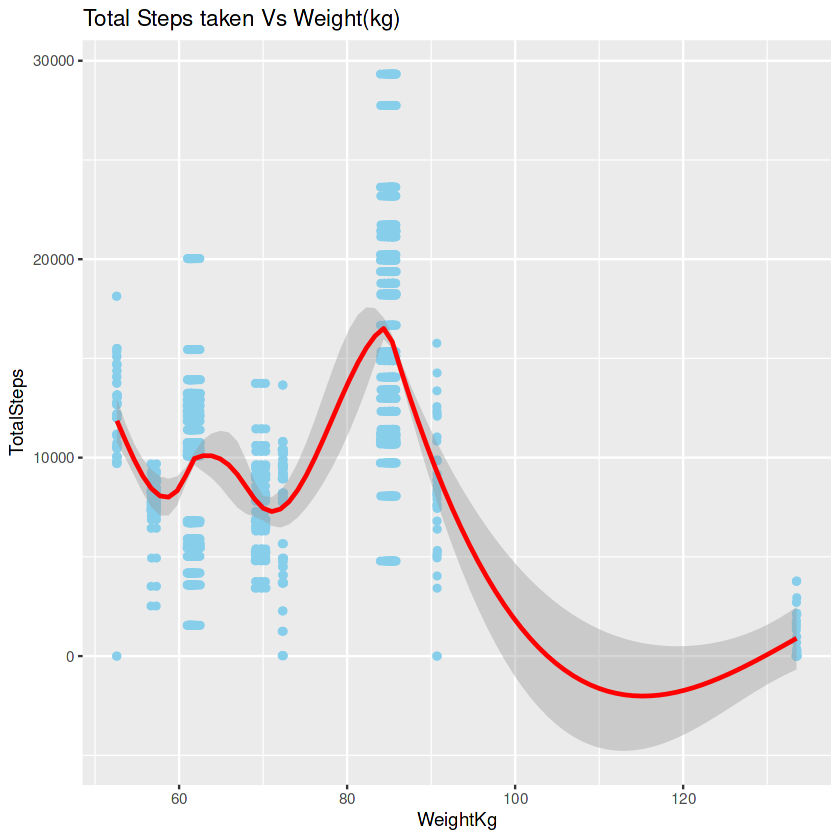

In [21]:
#Plot showing relation between users weight and total steps taken

library(ggplot2)

ggplot(data= weight_log)+ geom_jitter(mapping= aes(x= WeightKg, y=TotalSteps), color="skyblue")+ geom_smooth(aes(x= WeightKg, y=TotalSteps), color="red")+ ggtitle("Total Steps taken Vs Weight(kg)")



The above plot shows, as there is a decrease in total steps taken, weight increases. However,weight log data is available only for 8 users. Hence this data is not enough for the analysis.

**calculating values from `heart_rate` file**

In [22]:
n_distinct(heart_rate$Id)

summary(heart_rate$Value)

# Finding how many times the highest heart rate 203 has been spotted
length(which(heart_rate$Value == 203))

#Trying to find which Ids have recorded highest heart rate `203`

high_heartrate <- heart_rate %>%
                filter(if_any(everything(), ~ .x== "203" ))

high_heartrate

# Finding how many times the lowest heart rate "36" has been spotted
length(which(heart_rate$Value== 36))

#Trying to find which Ids have recorded lowest heart rate "36"
low_heartrate <-  heart_rate %>%
                filter(if_any(everything(), ~ .x == "36" ))

low_heartrate

[1] 14

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  36.00   63.00   73.00   77.33   88.00  203.00 

[1] 8

Id         Time                 Value
1 2022484408 4/21/2016 4:31:40 PM 203  
2 2022484408 4/21/2016 4:32:00 PM 203  
3 2022484408 4/21/2016 4:32:10 PM 203  
4 2022484408 4/21/2016 4:32:20 PM 203  
5 2022484408 4/21/2016 4:32:35 PM 203  
6 2022484408 4/21/2016 5:05:50 PM 203  
7 2022484408 4/21/2016 5:06:05 PM 203  
8 2022484408 4/21/2016 5:06:20 PM 203

[1] 2

Id         Time                Value
1 5577150313 5/4/2016 2:00:10 AM 36   
2 5577150313 5/4/2016 2:00:20 AM 36

Above analysis shows heart rates as high as 203 has been recorded for user  2022484408 and lowest heart rate 36 has been recorded for user 5577150313.

Usual heart rates as per [Harvard health](https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you) are 90-153 and anything beyond is considered risky. So, the above two users are at high risk.

In [23]:
#Seperating date components 

library(tidyr)

heart_1 <- separate(heart_rate, col=Time, into = c("date","time","am/pm"),sep=" ")

head(heart_1)

Id         date      time    am/pm Value
1 2022484408 4/12/2016 7:21:00 AM     97  
2 2022484408 4/12/2016 7:21:05 AM    102  
3 2022484408 4/12/2016 7:21:10 AM    105  
4 2022484408 4/12/2016 7:21:20 AM    103  
5 2022484408 4/12/2016 7:21:25 AM    101  
6 2022484408 4/12/2016 7:22:05 AM     95

Id         mean_heartrate
1 2022484408 80.23686      
2 2026352035 93.77631      
3 2347167796 76.72279      
4 4020332650 82.30058      
5 4388161847 66.13300      
6 4558609924 81.67395

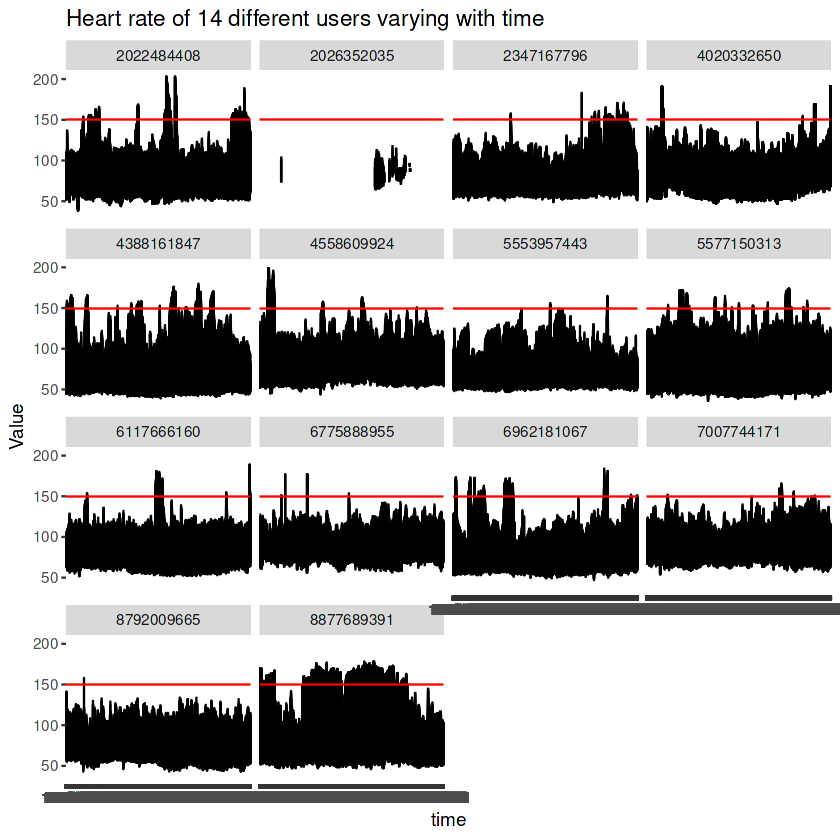

In [24]:
#Plotting individual plots for heart rates of 14 users V/s time

avg_heart_rate <- heart_1 %>%
                    group_by(Id) %>%
                    summarise(mean_heartrate= mean(Value) )
                

head(avg_heart_rate)

ggplot(heart_1,aes(x= time,y= Value))+ geom_line(aes(x=time,y= Value))+facet_wrap(~Id)+ geom_hline(aes(yintercept=150), color='red')+
ggtitle("Heart rate of 14 different users varying with time")

Among 14 users as per the data, almost everyone has a recorded heart rate above 150. This must be alerted to the users so they can get their health checked.

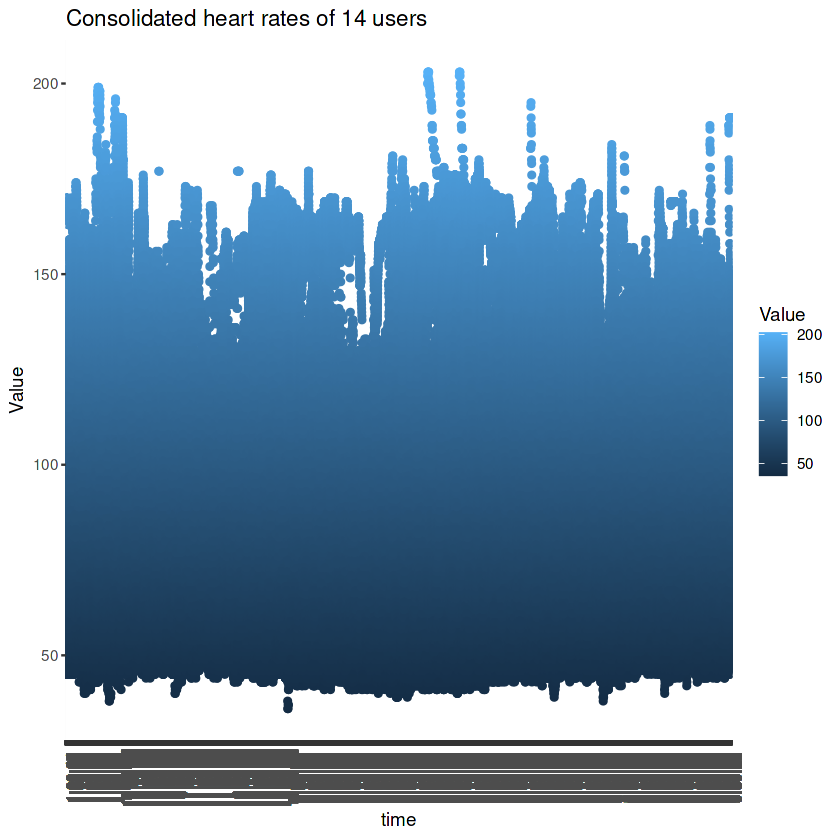

In [25]:
#Plotting heart rates of users combined V/s time

library(ggplot2)

ggplot(data=heart_1)+ geom_point(mapping=aes(x= time ,y=Value, color=Value))+ theme(axis.text.x = element_text(angle = 90))+ 
ggtitle("Consolidated heart rates of 14 users")


**Joining hourly calories, intensities and steps data matched by Id and avtivity hour**

In [26]:

h1<- merge(hcal,hint,by=c("Id", "ActivityHour") )

h_merged<- merge(h1, hstep, by=c("Id", "ActivityHour"))

head(h_merged)

Id         ActivityHour          Calories TotalIntensity AverageIntensity
1 1503960366 4/12/2016 1:00:00 AM  61        8             0.133333        
2 1503960366 4/12/2016 1:00:00 PM  66        6             0.100000        
3 1503960366 4/12/2016 10:00:00 AM 99       29             0.483333        
4 1503960366 4/12/2016 10:00:00 PM 65        9             0.150000        
5 1503960366 4/12/2016 11:00:00 AM 76       12             0.200000        
6 1503960366 4/12/2016 11:00:00 PM 81       21             0.350000        
  StepTotal
1 160      
2 221      
3 676      
4  89      
5 360      
6 338

In [27]:
#Formatting `activity hour` coloumn to hour, date and time

h_merged$hour = as.POSIXct(h_merged$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
h_merged$date <- format(h_merged$hour, format = "%m/%d/%y")
h_merged$time <- format(h_merged$hour, format = "%H:%M:%S")


head(h_merged)


Id         ActivityHour          Calories TotalIntensity AverageIntensity
1 1503960366 4/12/2016 1:00:00 AM  61        8             0.133333        
2 1503960366 4/12/2016 1:00:00 PM  66        6             0.100000        
3 1503960366 4/12/2016 10:00:00 AM 99       29             0.483333        
4 1503960366 4/12/2016 10:00:00 PM 65        9             0.150000        
5 1503960366 4/12/2016 11:00:00 AM 76       12             0.200000        
6 1503960366 4/12/2016 11:00:00 PM 81       21             0.350000        
  StepTotal hour                date     time    
1 160       2016-04-12 01:00:00 04/12/16 01:00:00
2 221       2016-04-12 13:00:00 04/12/16 13:00:00
3 676       2016-04-12 10:00:00 04/12/16 10:00:00
4  89       2016-04-12 22:00:00 04/12/16 22:00:00
5 360       2016-04-12 11:00:00 04/12/16 11:00:00
6 338       2016-04-12 23:00:00 04/12/16 23:00:00

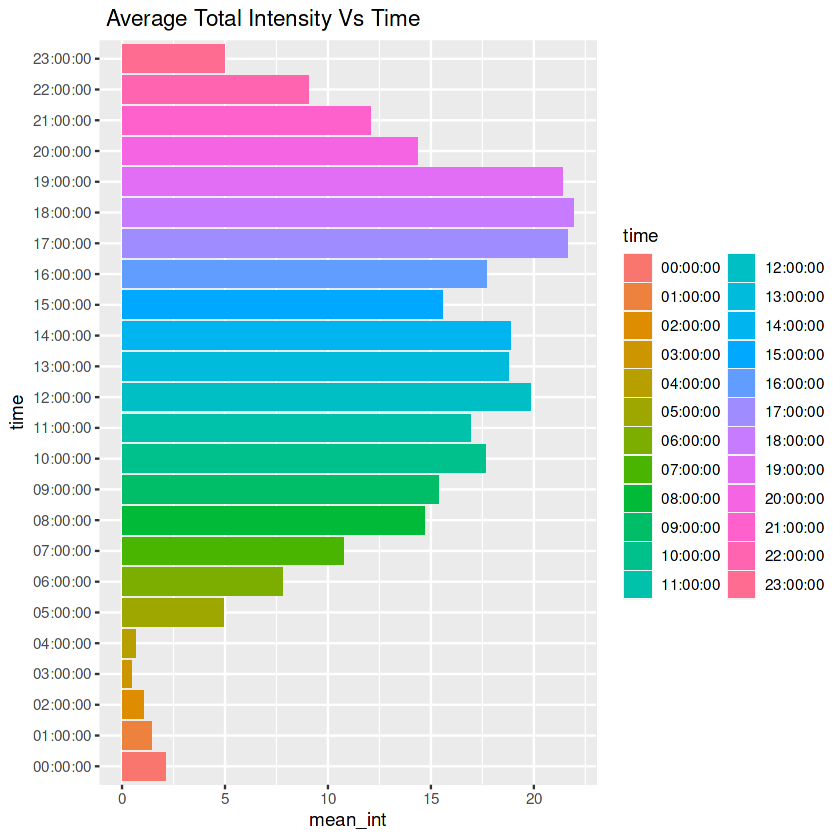

In [28]:
#calculating mean of intensities by time and grouping data by time

h_merged_by_time <- h_merged %>%
                group_by(time) %>%
                summarize(mean_int= mean(TotalIntensity))

#Plot showing time Vs mean intensities

ggplot(data=h_merged_by_time, aes(time,mean_int,fill= time) ) + 
geom_bar(stat = "identity") + 
ggtitle(" Average Total Intensity Vs Time")  +
theme(axis.text.x = element_text(angle = 0))+ coord_flip()




Plot describes intensity of users (i.e.,rate at which they are active) is high during the 5pm- 7pm. Also, 6pm has the highest number of average intensities of users, which means, most users are active at 6pm on average. 

 Below are plots show *calories V/s step count* and *calories V/s average intensities* of users

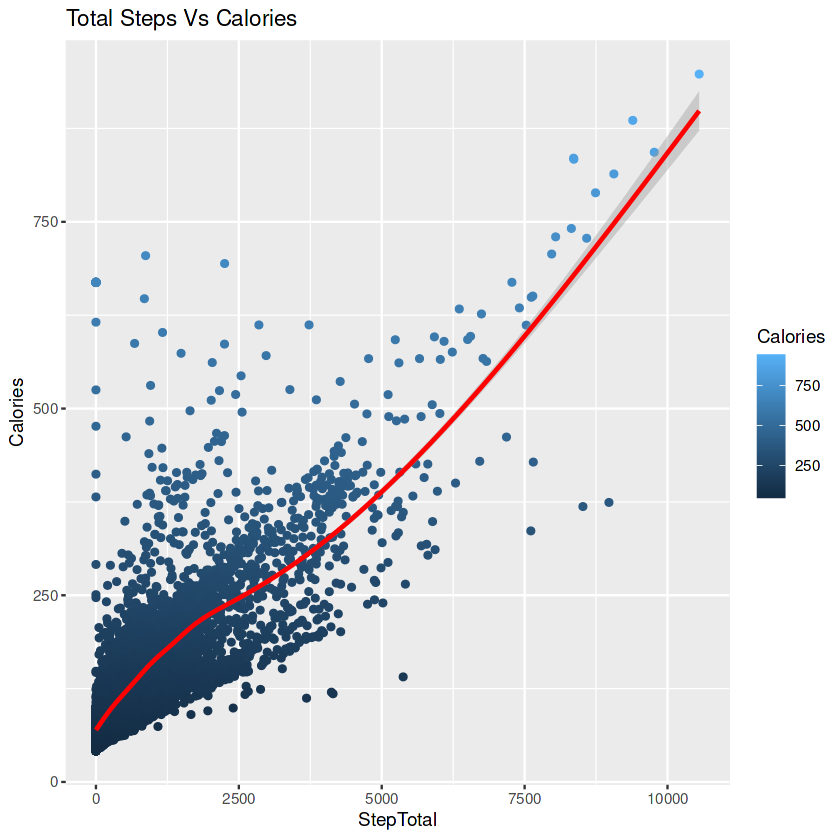

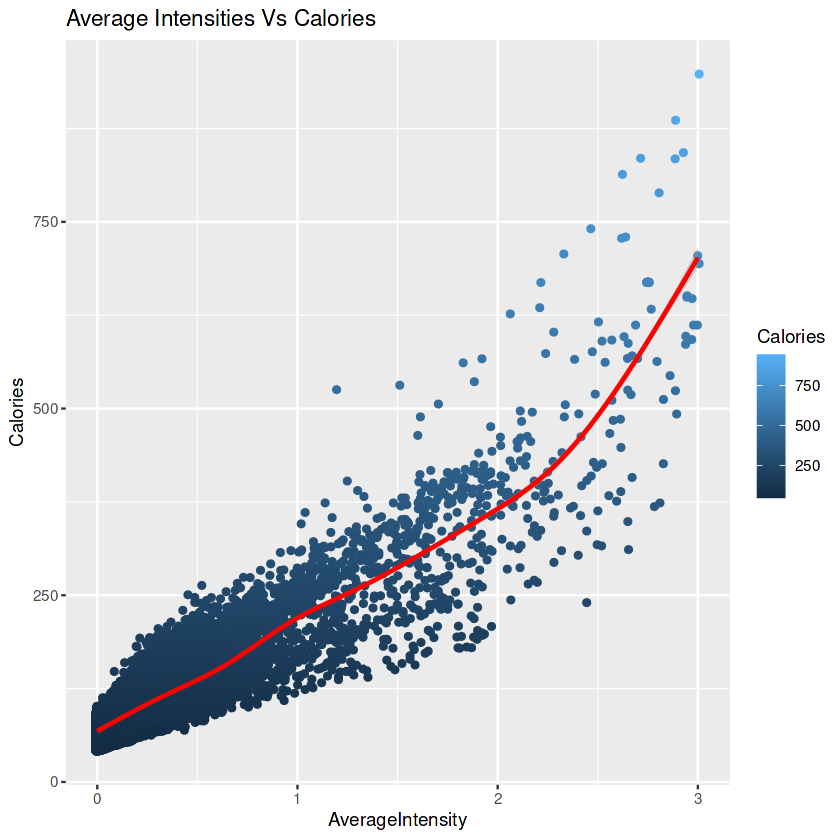

In [29]:

ggplot(data= h_merged,aes(x= StepTotal,y= Calories, color=Calories))+ geom_jitter(aes(x= StepTotal,y= Calories))+ geom_smooth(method="gam",formula = y ~ s(x, bs = "cs"),color="red")+ ggtitle("Total Steps Vs Calories")


ggplot(data= h_merged,aes(x= AverageIntensity,y= Calories, color=Calories))+ geom_jitter(aes(x= AverageIntensity,y= Calories))+ geom_smooth(method="gam",formula = y ~ s(x, bs = "cs"),color="red")+ ggtitle("Average Intensities Vs Calories")

Both the plots show a positive corelation between calories and stepcount, calories and average intensities. As the step count and intensity increase, calories burnt also increase.

As per an article from [Holland and Barrett](https://www.hollandandbarrett.com/the-health-hub/weight-management/fitness/exercise/your-recommended-daily-steps-by-age/), adults are recommemded to take 6000-10000 steps in a day,while, most of our users have reached 5000 steps per day.

In [30]:
str(sleep_day)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


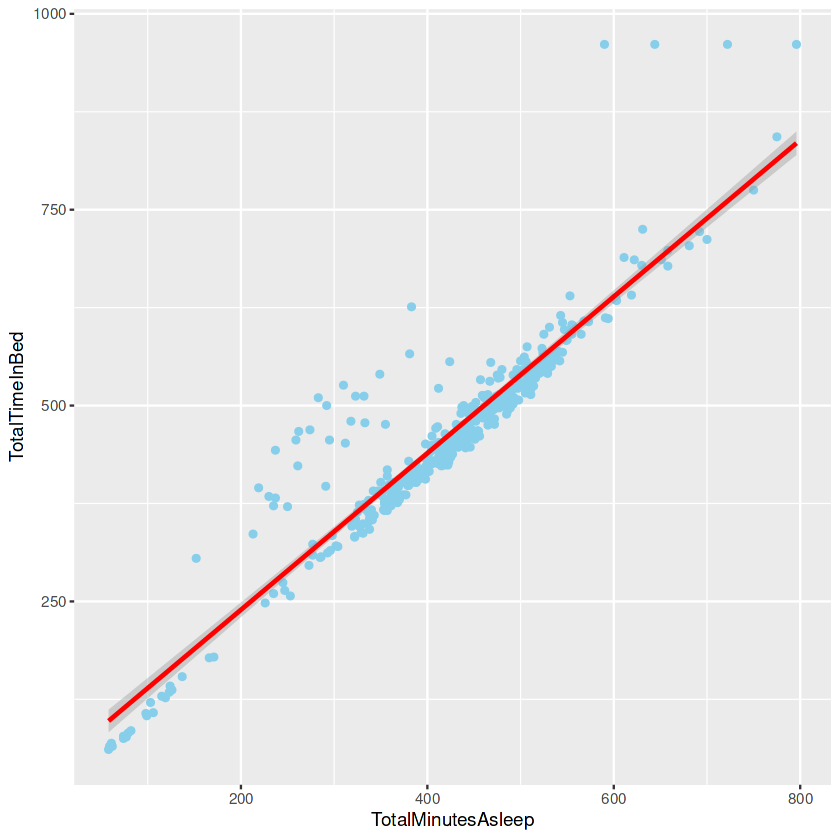

In [31]:
#Plotting "total time in bed" V/S "total time asleep"

ggplot(data=sleep_day,aes(x=TotalMinutesAsleep, y=TotalTimeInBed))+ geom_point(aes(x=TotalMinutesAsleep, y=TotalTimeInBed), color="skyblue")+ geom_smooth(method=lm,formula = 'y ~ x',color="red")

In [32]:
summary(sleep_day)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

Plot shows there is positive corelation between total time in bed and total minutes asleep. However, from the summary, mean values of total time in bed and total minutes slept have slight difference.

**Joining sleep days data and sleep minutes data, while matching Id's**

In [33]:
sleep_min1 <-merge(sleep_day,sleep_min, by=c("Id"))

head(sleep_min1)

Id         SleepDay              TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM 1                 327               
2 1503960366 4/12/2016 12:00:00 AM 1                 327               
3 1503960366 4/12/2016 12:00:00 AM 1                 327               
4 1503960366 4/12/2016 12:00:00 AM 1                 327               
5 1503960366 4/12/2016 12:00:00 AM 1                 327               
6 1503960366 4/12/2016 12:00:00 AM 1                 327               
  TotalTimeInBed date                 value logId      
1 346            4/12/2016 2:47:30 AM 3     11380564589
2 346            4/12/2016 2:48:30 AM 2     11380564589
3 346            4/12/2016 2:49:30 AM 1     11380564589
4 346            4/12/2016 2:50:30 AM 1     11380564589
5 346            4/12/2016 2:51:30 AM 1     11380564589
6 346            4/12/2016 2:52:30 AM 1     11380564589

In [34]:
#Deleting `SleepDay` coloumn from table as the joined table contains 2 date coloumns

sleep_min1$SleepDay <-NULL

head(sleep_min1)

Id         TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
1 1503960366 1                 327                346           
2 1503960366 1                 327                346           
3 1503960366 1                 327                346           
4 1503960366 1                 327                346           
5 1503960366 1                 327                346           
6 1503960366 1                 327                346           
  date                 value logId      
1 4/12/2016 2:47:30 AM 3     11380564589
2 4/12/2016 2:48:30 AM 2     11380564589
3 4/12/2016 2:49:30 AM 1     11380564589
4 4/12/2016 2:50:30 AM 1     11380564589
5 4/12/2016 2:51:30 AM 1     11380564589
6 4/12/2016 2:52:30 AM 1     11380564589

In [35]:
#Splitting date coloumn into hour, day and time

sleep_min1$hour = as.POSIXct(sleep_min1$date, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_min1$day <- format(sleep_min1$hour, format = "%m/%d/%y")
sleep_min1$time <- format(sleep_min1$hour, format = "%H:%M:%S")

head(sleep_min1)


Id         TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
1 1503960366 1                 327                346           
2 1503960366 1                 327                346           
3 1503960366 1                 327                346           
4 1503960366 1                 327                346           
5 1503960366 1                 327                346           
6 1503960366 1                 327                346           
  date                 value logId       hour                day      time    
1 4/12/2016 2:47:30 AM 3     11380564589 2016-04-12 02:47:30 04/12/16 02:47:30
2 4/12/2016 2:48:30 AM 2     11380564589 2016-04-12 02:48:30 04/12/16 02:48:30
3 4/12/2016 2:49:30 AM 1     11380564589 2016-04-12 02:49:30 04/12/16 02:49:30
4 4/12/2016 2:50:30 AM 1     11380564589 2016-04-12 02:50:30 04/12/16 02:50:30
5 4/12/2016 2:51:30 AM 1     11380564589 2016-04-12 02:51:30 04/12/16 02:51:30
6 4/12/2016 2:52:30 AM 1     11380564589 2016-04-12 02:52:30 04/12/16 02:52:30

In [36]:
#converting "day" char to date as "date_final"

sleep_min1 = sleep_min1 %>%
        mutate(date_final = mdy(day))

head(sleep_min1)

Id         TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
1 1503960366 1                 327                346           
2 1503960366 1                 327                346           
3 1503960366 1                 327                346           
4 1503960366 1                 327                346           
5 1503960366 1                 327                346           
6 1503960366 1                 327                346           
  date                 value logId       hour                day      time    
1 4/12/2016 2:47:30 AM 3     11380564589 2016-04-12 02:47:30 04/12/16 02:47:30
2 4/12/2016 2:48:30 AM 2     11380564589 2016-04-12 02:48:30 04/12/16 02:48:30
3 4/12/2016 2:49:30 AM 1     11380564589 2016-04-12 02:49:30 04/12/16 02:49:30
4 4/12/2016 2:50:30 AM 1     11380564589 2016-04-12 02:50:30 04/12/16 02:50:30
5 4/12/2016 2:51:30 AM 1     11380564589 2016-04-12 02:51:30 04/12/16 02:51:30
6 4/12/2016 2:52:30 AM 1     11380564589 2016-04-12 02:52:30 04/12/16 02:52:30
  date_final
1 2016-04-12
2 2016-04-12
3 2016-04-12
4 2016-04-12
5 2016-04-12
6 2016-04-12

In [37]:
#Changing dates to respective weekdays 

sleep_weekday<- sleep_min1 %>%
                mutate(weekday=weekdays(date_final), abbreviate = FALSE)

#Calculating average daily sleep time in hours

avg_sleep_daily<- sleep_weekday %>%
                group_by(weekday) %>%
                summarise(daily_sleep_time=mean(TotalMinutesAsleep/60))

View(avg_sleep_daily)


weekday   daily_sleep_time
1 Friday    7.196057        
2 Monday    7.224717        
3 Saturday  7.204020        
4 Sunday    7.156840        
5 Thursday  7.187049        
6 Tuesday   7.072453        
7 Wednesday 7.220441


Our analysis says, average sleep duration was 7hours per day.

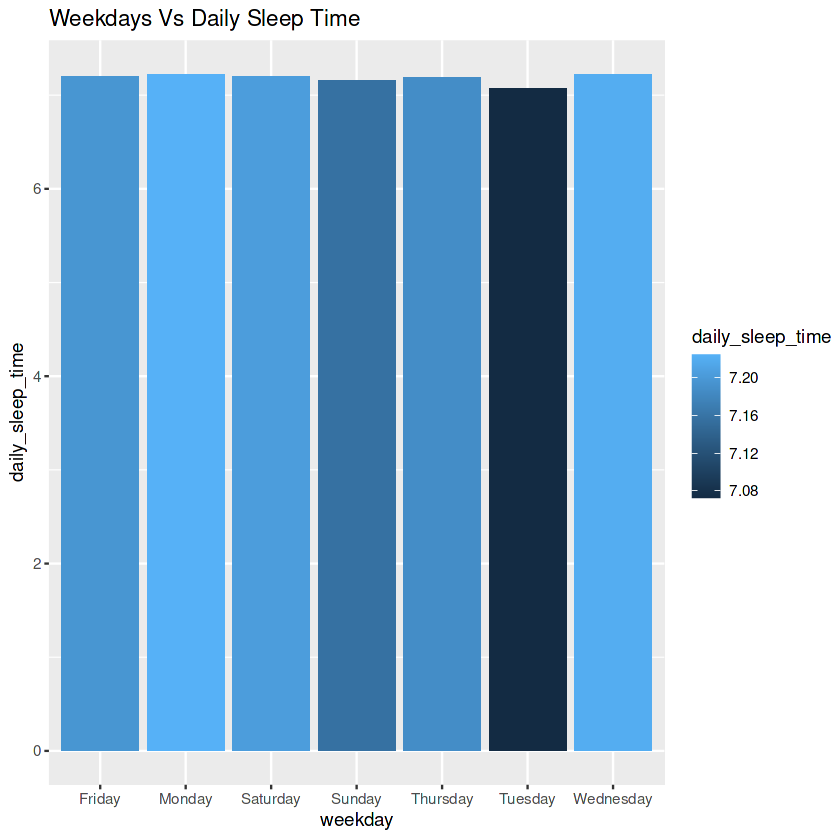

In [38]:
#Plotting `average daily sleep time` Vs `weekdays`


ggplot(data=avg_sleep_daily,aes(weekday, daily_sleep_time, fill= daily_sleep_time))+geom_col()+ 
ggtitle("Weekdays Vs Daily Sleep Time")

Plot shows that average sleep time remains greater than 7hours per day on all days, while Monday and Wednesday recordly slightly more hours slept

In [39]:
#Calculating values from sleep data

cal<- sleep_min1 %>%
            summarise(avgtime_in_bed = mean(TotalTimeInBed)/60,
                     avg_dailysleep_time= mean(TotalMinutesAsleep)/60,
                      difference= (avgtime_in_bed- avg_dailysleep_time),
                     max_sleep_duration= max(TotalMinutesAsleep)/60,
                     min_sleep_duration= min(TotalMinutesAsleep)/60)

View(cal)

avgtime_in_bed avg_dailysleep_time difference max_sleep_duration
1 7.84237        7.178392            0.6639784  13.26667          
  min_sleep_duration
1 0.9666667

In [40]:

summary(MET)


       Id            ActivityMinute          METs       
 Min.   :1.504e+09   Length:1325580     Min.   :  0.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 10.00  
 Median :4.445e+09   Mode  :character   Median : 10.00  
 Mean   :4.848e+09                      Mean   : 14.69  
 3rd Qu.:6.962e+09                      3rd Qu.: 11.00  
 Max.   :8.878e+09                      Max.   :157.00  

**Summary of analysis**

From the above analysis, it is found that 

**Activity analysis**

1. Total steps taken is higher on Tuesdays compared to other days and is least on Sundays.

2. Average step count of users is 7600 per day. [Holland and Barrett](https://www.hollandandbarrett.com/the-health-hub/weight-management/fitness/exercise/your-recommended-daily-steps-by-age/), recommemdeds to take 6000-10000 steps in a day

3. More than 80% of the users remain sedentary,only around 2% of users are highly active. 

4. A positive corelation was found between total active minutes and calories burnt by users. Average calorie burn is 2300.

5. It was found that daily average sedentary minutes is 990. Maximum sedentary minutes was around 1440. [Sems Journal](https://sems-journal.ch/13002#:~:text=The%20present%20study%20demonstrates%20that,in%20sedentary%20conditions%20%5B5%5D) suggests that limiting sedentary time to less than 6 hours per day(360minutes) to reduce the risk of obesity.

6. It was seen  that, as the sedentary minutes increase calorie burn decreases.Also, as steps taken by users decrease, tendency to gain weight increases.

7. From hourly calculations, it was found that 5pm-7pm remains highly intense region for users. On, average it is seen that 6pm is the time where most users are active. [TOI](hhttps://timesofindia.indiatimes.com/life-style/health-fitness/fitness/early-morning-vs-evening-which-is-the-best-time-to-exercise/articleshow/108736781.cms#:~:text=If%20you're%20aiming%20to,energy%20levels%20throughout%20the%20day) suggests morning activity for boosting metabolism and evening for strength training.

**Heart rate analysis**

7. Instances where heart beat rates as high as 203 and low as 36 have been spotted. However, average heart rates range from 66-93. [Harvard health](https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you) suggests heart rate range 90-153 and anything beyond is considered risky.

**Sleep analysis**

9. From sleep related data, it is evident that 7 hours per day is the average sleep duration recorded for users. Tuesday records least sleep hours. According to [Healthline](https://www.healthline.com/health/fitness-exercise/best-time-to-workout#The-Case-for-Working-Out-in-the-Morning),working out in the morning is recommended for weight loss. Whereas, working out in the evening could provide better quality sleep. Maximum sleep hours was 13 and minimum was 96minutes (1.5hours approx.)

10. In contrast, average time in bed and average duration slept has a difference of 66 minutes, which is almost 1 hour. This means that users are awake for around 1 hour in bed.While women being Bellabeat's customers, it was recommended by [India Today](https://www.indiatoday.in/lifestyle/wellness/story/world-sleep-day-2024-women-need-more-sleep-than-men-7-8-hours-are-not-enough-2514671-2024-03-15),that women need more than 7-8 hours of sleep, unlike men. 

**MET analysis**

11. As per an article from health line, aiming for 500METs a week is a good goal. It is seen that maximum METs recorded is 157 and average is 14.This  syncs with the sedentary minutes. According to [NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6078558/#:~:text=Exercise%20capacity%20is%20based%20on,METS%20or%20more%20is%20excellent), 9-11 METs per day is good. Our data shows average of 14.69METs, approx 15METs in a month.

# Share phase

Here are [some slides](https://docs.google.com/presentation/d/1mebJmbbJV6VXzYGtVbs5E8arn6yVq43e-6T9ihxOgKs/edit?usp=sharing) that could help you understand what has happened. Please do not hesitate to have a look.

# Act phase

1. Consider developing a unique brand identity
    Highlight how Bellabeat stands different in the market, develop a consistent brand face, energetic voice and a tone.


2. Add an extra layer of personalisation based on up to date trends
    Sending out pop-ups to remind customers to hydrate, move, relax or take deep breaths; highlighting emergencies like
    high/low heart rates, can motivate customers to build trust.


3. Invest in adding a chat-bot
    Virtual assistance to help customers to input additional information, place orders, help with refunds or understand
    product related features can aid in boosting online customer interaction.

4. Expand Bellabeat product line
    Finding new areas of customer market is always a good sign to grow. Bellabeat can try selling new products and
    services to improve their visibility.


5. Additional research 
    Bellabeat can concentrate on improving attractive content related to health & wellness for women, create ads
    highlighting  those topics, by using focus studies.


6. Understand customer reviews and feedback
    Feedback is how customers express their genuine views and interests. Considering feedback to further improve the
    products and services may help reach customers directly. 


**Thank you**